In [1]:
import pandas as pd
import pandas as pd
from collections import Counter

import plotly as py
import plotly.graph_objs as go

In [2]:
data=pd.read_excel('./KPL.xlsx')
pd.set_option('display.max_columns', None)
data=data.fillna(-1)  #填补空白数据

## 编码

### 队伍名编码成数字

In [3]:
#将队伍名转成数字
Teamall=set(list(data['teama'])+list(data['teamb']))
TeamDictF={}
TeamDictS={}
count=0
for i in Teamall:
    TeamDictF[i]=count
    TeamDictS[count]=i
    count+=1
TeamDictF

{'斗鱼XHW': 0,
 'AG超玩会': 1,
 '重庆狼队': 2,
 '虎牙小当家': 3,
 '苏州KSG': 4,
 '长沙TES.A': 5,
 'BOA': 6,
 'HJG': 7,
 'Wkk': 8,
 '北京WB': 9,
 '镇江VTG': 10,
 '佛山DRG': 11,
 '情久': 12,
 '成都AG超玩会': 13,
 '广州TTG': 14,
 '喵鱼': 15,
 '武汉eStarPro': 16}

### 英雄编码成数字

In [4]:
Heroall=set()
for i in range(1,5):
    for j in ['a','b']:
        Heroall=set.union(Heroall, set(list(data['ban%s%s'%(j,i)])))
for i in range(1,6):
    for j in ['a','b']:
        Heroall=set.union(Heroall, set(list(data['hero%s%s'%(j,i)])))
HeroDictF={}
HeroDictS={}
count=0
for i in Heroall:
    HeroDictF[i]=count
    HeroDictS[count]=i
    count+=1
HeroDictS

{0: '海月',
 1: '裴擒虎',
 2: '张良',
 3: '项羽',
 4: '曜',
 5: '沈梦溪',
 6: '明世隐',
 7: '后裔',
 8: '东皇太一',
 9: '露娜',
 10: '干将莫邪',
 11: '马可波罗',
 12: '宫本武藏',
 13: '虞姬',
 14: '娜可露露',
 15: '狄仁杰',
 16: '庄周',
 17: '不知火舞',
 18: '夏洛特',
 19: '吕布',
 20: '亚连',
 21: '莱西奥',
 22: '姬小满',
 23: '扁鹊',
 24: '西施',
 25: '孙膑',
 26: '凯',
 27: '蔡文姬',
 28: '苏烈',
 29: '嬴政',
 30: '猪八戒',
 31: '狂铁',
 32: '关羽',
 33: '张飞',
 34: '鬼谷子',
 35: '镜',
 36: '鲁班七号',
 37: '梦奇',
 38: '赵怀真',
 39: '伽罗',
 40: '白起',
 41: '达摩',
 42: '公孙离',
 43: '橘右京',
 44: '鲁班大师',
 45: '马超',
 46: '盾山',
 47: '钟馗',
 48: '兰陵王',
 49: '廉颇',
 50: '刘邦',
 51: '金蝉',
 52: '李元芳',
 53: '花木兰',
 54: '上官婉儿',
 55: '蒙恬',
 56: '戈娅',
 57: '墨子',
 58: '奕星',
 59: '老夫子',
 60: '曹操',
 61: '周瑜',
 62: '蒙犽',
 63: '安其拉',
 64: '王昭君',
 65: '牛魔',
 66: '夏侯惇',
 67: '太乙真人',
 68: '姜子牙',
 69: '黄忠',
 70: '上官婉儿 ',
 71: '孙尚香',
 72: '火舞',
 73: -1,
 74: '大乔'}

In [5]:
data_copy=data.copy()

## 数据处理

In [6]:
data['teama']=data['teama'].map(TeamDictF)
data['teamb']=data['teamb'].map(TeamDictF)
data['bana1']=data['bana1'].map(HeroDictF)
data['bana2']=data['bana2'].map(HeroDictF)
data['bana3']=data['bana3'].map(HeroDictF)
data['bana4']=data['bana4'].map(HeroDictF)
data['banb1']=data['banb1'].map(HeroDictF)
data['banb2']=data['banb2'].map(HeroDictF)
data['banb3']=data['banb3'].map(HeroDictF)
data['banb4']=data['banb4'].map(HeroDictF)
data['heroa1']=data['heroa1'].map(HeroDictF)
data['heroa2']=data['heroa2'].map(HeroDictF)
data['heroa3']=data['heroa3'].map(HeroDictF)
data['heroa4']=data['heroa4'].map(HeroDictF)
data['heroa5']=data['heroa5'].map(HeroDictF)
data['herob1']=data['herob1'].map(HeroDictF)
data['herob2']=data['herob2'].map(HeroDictF)
data['herob3']=data['herob3'].map(HeroDictF)
data['herob4']=data['herob4'].map(HeroDictF)
data['herob5']=data['herob5'].map(HeroDictF)

In [7]:
data

,match,teama,teamb,label,moneya,moneyb,killa,killb,towera,towerb,bana1,bana2,bana3,bana4,banb1,banb2,banb3,banb4,heroa1,heroa2,heroa3,heroa4,heroa5,herob1,herob2,herob3,herob4,herob5
0,101301,16,14,0,60365,69653,10,13,2,6,62,57,25,47,66,12,58,74,30,60,64,36,44,22,38,10,52,65
1,101302,14,16,1,45766,42766,9,5,3,3,0,24,22,38,56,48,1,44,4,60,5,59,74,67,71,35,3,68
2,101303,3,5,0,49396,58991,4,11,2,7,0,24,2,67,15,56,44,1,74,59,64,20,60,22,66,42,33,10
3,101304,3,5,1,43614,31902,11,4,3,2,71,39,27,74,22,10,56,44,18,23,67,42,1,31,38,64,65,52
4,101305,5,3,1,67613,62944,14,6,5,1,3,55,25,47,51,0,74,44,18,54,28,26,56,27,71,9,5,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,102905,11,2,0,83183,84338,14,12,6,4,67,42,18,1,44,48,22,74,66,32,58,71,8,10,38,53,52,65
105,103001,13,0,1,60170,56109,13,7,5,2,67,56,47,25,39,5,44,74,29,13,18,65,1,22,66,24,71,6
106,103002,0,13,0,42569,51737,6,13,1,6,41,47,35,67,26,48,18,74,60,30,58,36,44,22,38,10,52,33
107,103003,0,13,0,30859,38368,2,6,1,5,37,48,44,20,25,5,56,74,65,10,42,26,31,60,58,15,67,66


## ban位预测

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
numa=TeamDictF['重庆狼队']

WOLVESa=data[(data['teama']==numa)&(data['label']==1)][['bana1','bana2','bana3','bana4']]
WOLVESa.columns=['1','2','3','4'] 
WOLVESb=data[(data['teamb']==numa)&(data['label']==0)][['bana1','bana2','bana3','bana4']]
WOLVESb.columns=['1','2','3','4'] 
WOLVESwin=pd.concat([WOLVESa,WOLVESb])
WOLVESwin['label']=1
WOLVESa=data[(data['teama']==numa)&(data['label']==0)][['bana1','bana2','bana3','bana4']]
WOLVESa.columns=['1','2','3','4'] 
WOLVESb=data[(data['teamb']==numa)&(data['label']==1)][['bana1','bana2','bana3','bana4']]
WOLVESb.columns=['1','2','3','4'] 
WOLVESfail=pd.concat([WOLVESa,WOLVESb])
WOLVESfail['label']=0
WOLVES=pd.concat([WOLVESwin,WOLVESfail])
y=WOLVES['label']
x=WOLVES.drop(['label'],axis=1)
UniqueWOLVES=x.copy().drop_duplicates(subset=x.columns, keep='first')
mnb = MultinomialNB() 
mnb.fit(x,y)
y_pre=mnb.predict_proba(UniqueWOLVES)[:,1]
UniqueWOLVES['y_pre']=y_pre
UniqueWOLVES['1']=UniqueWOLVES['1'].map(HeroDictS)
UniqueWOLVES['2']=UniqueWOLVES['2'].map(HeroDictS)
UniqueWOLVES['3']=UniqueWOLVES['3'].map(HeroDictS)
UniqueWOLVES['4']=UniqueWOLVES['4'].map(HeroDictS)
UniqueWOLVES=UniqueWOLVES.sort_values(by='y_pre',ascending=False)
UniqueWOLVES=UniqueWOLVES.reset_index()
UniqueWOLVES=UniqueWOLVES.drop(['index'],axis=1)
UniqueWOLVES

,1,2,3,4,y_pre
0,太乙真人,公孙离,夏洛特,裴擒虎,1.000000
1,孙尚香,蔡文姬,伽罗,钟馗,1.000000
2,周瑜,奕星,亚连,鲁班大师,0.999999
3,上官婉儿,干将莫邪,赵怀真,钟馗,0.999996
4,奕星,苏烈,蒙恬,亚连,0.999989
5,伽罗,孙膑,公孙离,裴擒虎,0.999490
6,-1,-1,-1,-1,0.996970
7,兰陵王,凯,太乙真人,公孙离,0.974972
8,镜,干将莫邪,钟馗,曹操,0.872532
9,孙膑,苏烈,亚连,蒙恬,0.731570


In [12]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
numb=TeamDictF['成都AG超玩会']
AGa=data[(data['teama']==numb)&(data['label']==1)][['bana1','bana2','bana3','bana4']]
AGa.columns=['1','2','3','4'] 
AGb=data[(data['teamb']==numb)&(data['label']==0)][['bana1','bana2','bana3','bana4']]
AGb.columns=['1','2','3','4'] 
AGwin=pd.concat([AGa,AGb])
AGwin['label']=1
AGa=data[(data['teama']==numb)&(data['label']==0)][['bana1','bana2','bana3','bana4']]
AGa.columns=['1','2','3','4'] 
AGb=data[(data['teamb']==numb)&(data['label']==1)][['bana1','bana2','bana3','bana4']]
AGb.columns=['1','2','3','4'] 
AGfail=pd.concat([AGa,AGb])
AGfail['label']=0
AG=pd.concat([AGwin,AGfail])
AGwin
y=AG['label']
x=AG.drop(['label'],axis=1)
UniqueAG=x.copy().drop_duplicates(subset=x.columns, keep='first')
mnb = MultinomialNB() 
mnb.fit(x,y)
y_pre=mnb.predict_proba(UniqueAG)[:,0]
UniqueAG['y_pre']=y_pre
UniqueAG['1']=UniqueAG['1'].map(HeroDictS)
UniqueAG['2']=UniqueAG['2'].map(HeroDictS)
UniqueAG['3']=UniqueAG['3'].map(HeroDictS)
UniqueAG['4']=UniqueAG['4'].map(HeroDictS)
UniqueAG=UniqueAG.sort_values(by='y_pre',ascending=False)
UniqueAG=UniqueAG.reset_index()
UniqueAG=UniqueAG.drop(['index'],axis=1)
UniqueAG

,1,2,3,4,y_pre
0,蒙恬,项羽,孙膑,钟馗,1.000000
1,戈娅,孙膑,钟馗,大乔,1.000000
2,苏烈,戈娅,公孙离,孙膑,1.000000
3,伽罗,黄忠,公孙离,裴擒虎,1.000000
4,太乙真人,戈娅,钟馗,孙膑,1.000000
5,伽罗,太乙真人,赵怀真,裴擒虎,1.000000
6,戈娅,公孙离,太乙真人,孙膑,1.000000
7,干将莫邪,蒙犽,孙膑,赵怀真,1.000000
8,牛魔,伽罗,孙膑,钟馗,1.000000
9,公孙离,黄忠,凯,鲁班大师,1.000000


## 英雄胜率预测

In [35]:
WOLVESa=data[(data['teama']==numa)&(data['label']==1)][['heroa1','heroa2','heroa3','heroa4','heroa5']]
WOLVESa.columns=['1号位','2号位','3号位','4号位','5号位'] 
WOLVESb=data[(data['teamb']==numa)&(data['label']==0)][['herob1','herob2','herob3','herob4','herob5']]
WOLVESb.columns=['1号位','2号位','3号位','4号位','5号位'] 
WOLVESwin=pd.concat([WOLVESa,WOLVESb])
WOLVESwin['label']=1
WOLVESa=data[(data['teama']==numa)&(data['label']==0)][['heroa1','heroa2','heroa3','heroa4','heroa5']]
WOLVESa.columns=['1号位','2号位','3号位','4号位','5号位'] 
WOLVESb=data[(data['teamb']==numa)&(data['label']==1)][['herob1','herob2','herob3','herob4','herob5']]
WOLVESb.columns=['1号位','2号位','3号位','4号位','5号位'] 
WOLVESfail=pd.concat([WOLVESa,WOLVESb])
WOLVESfail['label']=0
WOLVES=pd.concat([WOLVESwin,WOLVESfail])
WOLVESwin
y=WOLVES['label']
x=WOLVES.drop(['label'],axis=1)
UniqueWOLVES=x.copy().drop_duplicates(subset=x.columns, keep='first')
mnb = MultinomialNB() 
mnb.fit(x,y)
y_pre=mnb.predict_proba(UniqueWOLVES)[:,1]
UniqueWOLVES['y_pre']=y_pre
UniqueWOLVES['1号位']=UniqueWOLVES['1号位'].map(HeroDictS)
UniqueWOLVES['2号位']=UniqueWOLVES['2号位'].map(HeroDictS)
UniqueWOLVES['3号位']=UniqueWOLVES['3号位'].map(HeroDictS)
UniqueWOLVES['4号位']=UniqueWOLVES['4号位'].map(HeroDictS)
UniqueWOLVES['5号位']=UniqueWOLVES['5号位'].map(HeroDictS)
UniqueWOLVES=UniqueWOLVES.sort_values(by='y_pre',ascending=False)
UniqueWOLVES=UniqueWOLVES.reset_index()
UniqueWOLVES=UniqueWOLVES.drop(['index'],axis=1)
UniqueWOLVES

,1号位,2号位,3号位,4号位,5号位,y_pre
0,孙尚香,夏侯惇,蔡文姬,狂铁,金蝉,1.000000
1,戈娅,橘右京,亚连,苏烈,嬴政,1.000000
2,王昭君,赵怀真,狂铁,伽罗,牛魔,1.000000
3,姬小满,孙尚香,曹操,沈梦溪,蔡文姬,0.999955
4,钟馗,夏洛特,干将莫邪,伽罗,兰陵王,0.999950
5,苏烈,李元芳,亚连,橘右京,奕星,0.999886
6,亚连,曹操,沈梦溪,老夫子,大乔,0.999869
7,马超,金蝉,夏侯惇,狄仁杰,鲁班大师,0.999814
8,凯,公孙离,嬴政,孙膑,狂铁,0.999422
9,狂铁,赵怀真,干将莫邪,墨子,马可波罗,0.997006


In [36]:
AGa=data[(data['teama']==numb)&(data['label']==1)][['heroa1','heroa2','heroa3','heroa4','heroa5']]
AGa.columns=['1号位','2号位','3号位','4号位','5号位'] 
AGb=data[(data['teamb']==numb)&(data['label']==0)][['herob1','herob2','herob3','herob4','herob5']]
AGb.columns=['1号位','2号位','3号位','4号位','5号位'] 
AGwin=pd.concat([AGa,AGb])
AGwin['label']=1
AGa=data[(data['teama']==numb)&(data['label']==0)][['heroa1','heroa2','heroa3','heroa4','heroa5']]
AGa.columns=['1号位','2号位','3号位','4号位','5号位'] 
AGb=data[(data['teamb']==numb)&(data['label']==1)][['herob1','herob2','herob3','herob4','herob5']]
AGb.columns=['1号位','2号位','3号位','4号位','5号位'] 
AGfail=pd.concat([AGa,AGb])
AGfail['label']=0
AG=pd.concat([AGwin,AGfail])
AGwin
y=AG['label']
x=AG.drop(['label'],axis=1)
UniqueAG=x.copy().drop_duplicates(subset=x.columns, keep='first')
mnb = MultinomialNB() 
mnb.fit(x,y)
if mnb.predict_proba(UniqueAG).shape[1] == 1:
    y_pre = mnb.predict_proba(UniqueAG)[:, 0]
else:
    y_pre = mnb.predict_proba(UniqueAG)[:, 1]
#y_pre=mnb.predict_proba(UniqueAG)[:,1]
UniqueAG['y_pre']=y_pre
UniqueAG['1号位']=UniqueAG['1号位'].map(HeroDictS)
UniqueAG['2号位']=UniqueAG['2号位'].map(HeroDictS)
UniqueAG['3号位']=UniqueAG['3号位'].map(HeroDictS)
UniqueAG['4号位']=UniqueAG['4号位'].map(HeroDictS)
UniqueAG['5号位']=UniqueAG['5号位'].map(HeroDictS)
UniqueAG=UniqueAG.sort_values(by='y_pre',ascending=False)
UniqueAG=UniqueAG.reset_index()
UniqueAG=UniqueAG.drop(['index'],axis=1)
UniqueAG

,1号位,2号位,3号位,4号位,5号位,y_pre
0,花木兰,兰陵王,沈梦溪,老夫子,大乔,1.000000
1,嬴政,李元芳,姬小满,裴擒虎,鲁班大师,1.000000
2,裴擒虎,曹操,牛魔,虞姬,沈梦溪,1.000000
3,王昭君,廉颇,蔡文姬,亚连,戈娅,1.000000
4,嬴政,虞姬,夏洛特,牛魔,裴擒虎,1.000000
5,蔡文姬,凯,海月,亚连,戈娅,1.000000
6,王昭君,裴擒虎,狂铁,孙尚香,张飞,1.000000
7,蒙恬,镜,钟馗,狄仁杰,沈梦溪,1.000000
8,姬小满,赵怀真,干将莫邪,李元芳,达摩,1.000000
9,大乔,夏侯惇,曹操,海月,伽罗,1.000000


## 决赛胜率预测

In [39]:
#bo7 
from scipy.special import comb
def pre(score):
    win=score
    fail=1-score
    score1=score**4
    score2=comb(4,1)*(win**3)*(fail)*win
    score3=comb(5,2)*(win**3)*(fail**2)*win
    score4=comb(6,3)*(win**3)*(fail**3)*win    
    return score1+score2+score3+score4
allteam=pd.read_excel('全部战队-20231013-20231105.xlsx')
WOLVESwin=allteam.iloc[1,2]
AGwin=allteam.iloc[0,2]
WOLVES=WOLVESwin/(WOLVESwin+AGwin)
AG=AGwin/(WOLVESwin+AGwin)
print('成都AG超玩会胜利概率为%s'%pre(AG))
print('重庆狼队胜利概率为%s'%pre(WOLVES))

成都AG超玩会胜利概率为0.3977382722023741
重庆狼队胜利概率为0.6022617277976259


## 选手雷达图

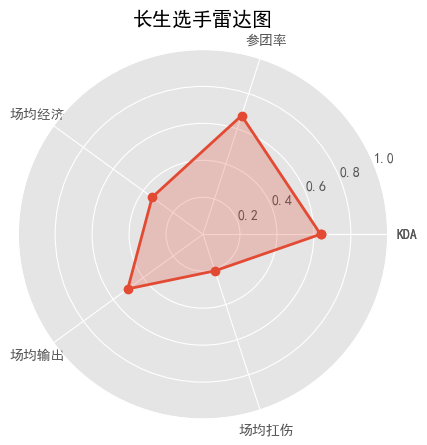

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
 
farm=pd.read_excel('选手数据-FARM与团队-20231013-20231105.xlsx')
kda=pd.read_excel('选手数据-KDA-20231013-20231105.xlsx')
values = [kda.iloc[0,4]/8,kda.iloc[0,5],farm.iloc[35,4]*2,farm.iloc[35,6]*2,farm.iloc[35,8]*2]
feature = ['KDA','参团率','场均经济','场均输出','场均扛伤']

angles=np.linspace(0, 2*np.pi,len(values), endpoint=False)
 
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))
 
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, feature + [feature[0]])
ax.set_ylim(0,1)
plt.title('长生选手雷达图')
ax.grid(True)
plt.show()

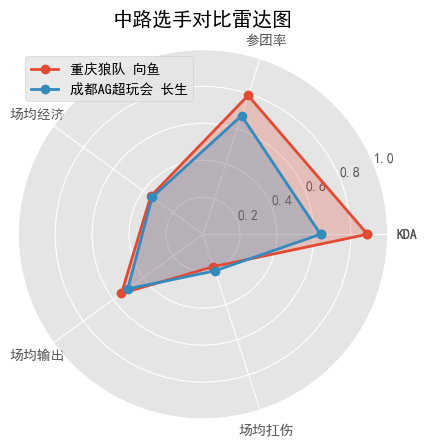

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
farm=pd.read_excel('选手数据-FARM与团队-20231013-20231105.xlsx')
kda=pd.read_excel('选手数据-KDA-20231013-20231105.xlsx')
values = [kda.iloc[6,4]/8,kda.iloc[6,5],farm.iloc[10,4]*2,farm.iloc[10,6]*2,farm.iloc[10,8]*2]
feature = ['KDA','参团率','场均经济','场均输出','场均扛伤']
angles=np.linspace(0, 2*np.pi,len(values), endpoint=False)
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))
values_2=[kda.iloc[0,4]/8,kda.iloc[0,5],farm.iloc[35,4]*2,farm.iloc[35,6]*2,farm.iloc[35,8]*2]
values_2=np.concatenate([values_2,[values_2[0]]])
 
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2,label='重庆狼队 向鱼')
ax.fill(angles, values, alpha=0.25)
 
ax.plot(angles, values_2, 'o-', linewidth=2,label='成都AG超玩会 长生')
ax.fill(angles, values_2, alpha=0.25)
 
ax.set_thetagrids(angles * 180/np.pi, feature + [feature[0]])
ax.set_ylim(0,1)
plt.title('中路选手对比雷达图')
plt.legend(loc='best')
ax.grid(True)
plt.show()